In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# CURRENTLY IGNORED

In [21]:
df = pd.read_csv('step_04/clinical_attributes.csv')
df

0         1    2         3         4         5         6  \
0     1.112940 -1.112940  0.0 -0.082549  0.483550 -0.276591 -0.105454   
1    -0.898521  0.898521  0.0 -0.082549  0.483550 -0.276591 -0.105454   
2    -0.898521  0.898521  0.0 -0.082549 -2.068039 -0.276591 -0.105454   
3     1.112940 -1.112940  0.0 -0.082549  0.483550 -0.276591 -0.105454   
4    -0.898521  0.898521  0.0 -0.082549  0.483550 -0.276591 -0.105454   
...        ...       ...  ...       ...       ...       ...       ...   
1177  1.112940 -1.112940  0.0 -0.082549  0.483550 -0.276591 -0.105454   
1178 -0.898521  0.898521  0.0 -0.082549  0.483550 -0.276591 -0.105454   
1179  1.112940 -1.112940  0.0 -0.082549 -2.068039  3.615443 -0.105454   
1180 -0.898521  0.898521  0.0 -0.082549  0.483550 -0.276591 -0.105454   
1181  1.112940 -1.112940  0.0 -0.082549  0.483550 -0.276591 -0.105454   

             7         8         9  ...        51        52        53  \
0    -0.334585 -0.356072 -0.334585  ... -0.464811 -1.506212  0.920081   
1    -0.334585 -0.356072 -0.334585  ...  2.151411 -1.506212 -0.710407   
2     2.988775 -0.356072 -0.334585  ...  2.151411 -1.506212 -0.710407   
3    -0.334585 -0.356072 -0.334585  ...  2.151411 -1.506212 -0.710407   
4    -0.334585 -0.356072 -0.334585  ... -0.464811 -1.506212  0.920081   
...        ...       ...       ...  ...       ...       ...       ...   
1177 -0.334585 -0.356072 -0.334585  ... -0.464811  1.200847 -0.710407   
1178 -0.334585 -0.356072 -0.334585  ... -0.464811  1.200847  0.920081   
1179 -0.334585 -0.356072 -0.334585  ... -0.464811  1.200847  0.920081   
1180 -0.334585 -0.356072 -0.334585  ... -0.464811  1.200847  0.920081   
1181 -0.334585 -0.356072 -0.334585  ... -0.464811  1.200847  0.920081   

            54        55        56        57        58        59        60  
0     0.803890 -0.572624 -1.181899  0.068554  0.801041 -1.462786 -1.465150  
1     0.803890  0.057582 -1.181899  0.080053 -1.248376 -0.914537  0.507296  
2     0.803890  1.317995 -1.523632  0.103053  0.801041  0.181961  0.507296  
3     0.803890  0.057582 -0.498433  0.068554  0.801041 -1.462786  0.507296  
4     0.803890 -0.572624 -0.840166  0.128352  0.801041  1.388109  0.507296  
...        ...       ...       ...       ...       ...       ...       ...  
1177  0.803890  0.057582 -0.840166  0.080053  0.801041 -0.914537  0.507296  
1178  0.803890  0.057582 -0.156700  1.299020 -1.248376  2.374957  0.507296  
1179  0.803890  0.057582 -0.498433  1.253021  0.801041  0.181961  0.507296  
1180 -1.243951  0.057582  0.185033  1.241522  0.801041 -0.366288  0.507296  
1181  0.803890  0.057582 -0.840166  1.241522  0.801041 -0.366288  0.507296  

[1182 rows x 61 columns]

In [24]:
response = pd.read_csv('step_04/response.csv')
response

overall_survival
0                    1
1                    0
2                    1
3                    1
4                    1
...                ...
1177                 0
1178                 1
1179                 1
1180                 0
1181                 0

[1182 rows x 1 columns]

In [26]:
correlation_matrix = df.corr()

In [27]:
# Set a threshold
threshold = 0.5  # You can change this value based on your needs

# Create a mask for correlations greater than the threshold
mask = (correlation_matrix.abs() >= threshold) & (correlation_matrix != 1)

# Create a new DataFrame to hold the filtered correlations
filtered_correlation_matrix = correlation_matrix.where(mask)

# Create heatmap
plt.figure(figsize=(50, 50), dpi=300)  # Adjust the size as needed
sns.heatmap(filtered_correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True, cbar_kws={"shrink": .8}, mask=filtered_correlation_matrix.isnull())
plt.title('Filtered Correlation Plot (Threshold: {})'.format(threshold))
plt.show()

In [28]:
correlation_list = []
for i in range(len(filtered_correlation_matrix.columns)):
    for j in range(i + 1, len(filtered_correlation_matrix.columns)):
        if mask.iloc[i, j]:  # If the correlation is greater than the threshold
            feature_1 = filtered_correlation_matrix.columns[i]
            feature_2 = filtered_correlation_matrix.columns[j]
            correlation_value = filtered_correlation_matrix.iloc[i, j]
            correlation_list.append((feature_1, feature_2, correlation_value))

# Convert to a DataFrame for easy viewing
correlation_df = pd.DataFrame(correlation_list, columns=['Feature 1', 'Feature 2', 'Correlation'])
correlation_df.to_csv('correlation.csv', index=False)

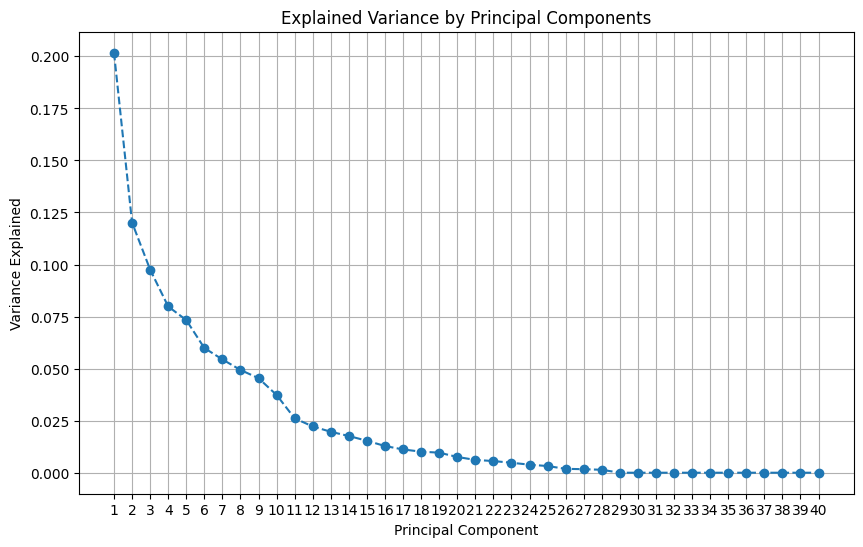

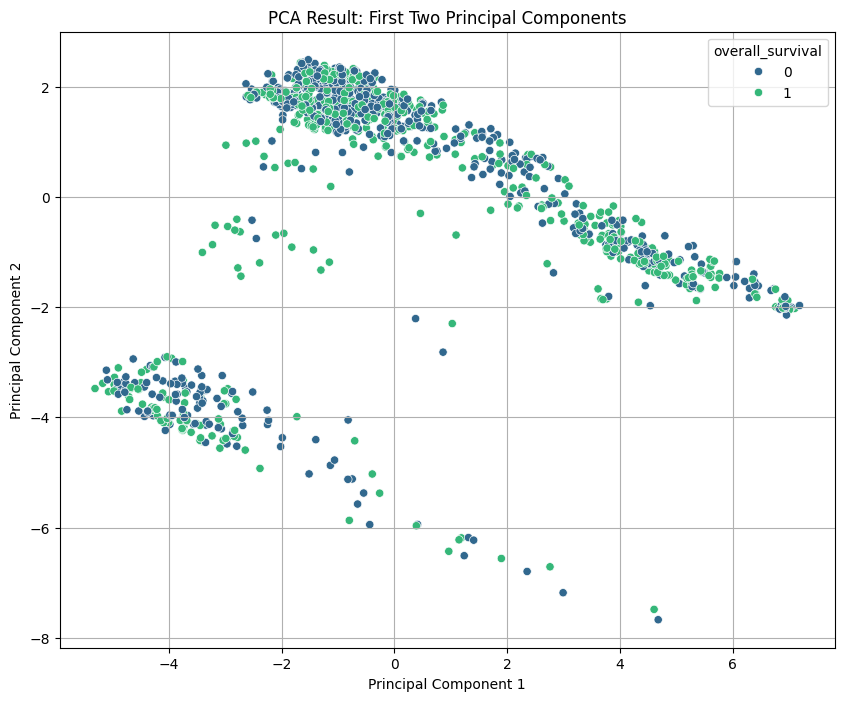

In [29]:
# Set a threshold
threshold = 0.5  # Change this value based on your needs

# Create a mask for correlations greater than the threshold
mask = (correlation_matrix.abs() >= threshold) & (correlation_matrix != 1)

# Get the columns that meet the threshold criteria
highly_correlated_columns = mask.any(axis=1)
filtered_columns = correlation_matrix.columns[highly_correlated_columns]

# Subset the DataFrame
filtered_df = df[filtered_columns]

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(filtered_df)

# Perform PCA
pca = PCA(n_components=min(scaled_data.shape)-1)  # Number of components to keep
pca_result = pca.fit_transform(scaled_data)

# Create a DataFrame with PCA results
pca_df = pd.DataFrame(data=pca_result, columns=[f'PC{i+1}' for i in range(pca_result.shape[1])])

# Visualize the explained variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker='o', linestyle='--')
plt.title('Explained Variance by Principal Components')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.xticks(range(1, len(pca.explained_variance_ratio_) + 1))
plt.grid()
plt.show()

# Optionally, visualize the first two principal components
plt.figure(figsize=(10, 8))
sns.scatterplot(x=pca_df['PC1'], y=pca_df['PC2'], hue=response["overall_survival"], palette='viridis')
plt.title('PCA Result: First Two Principal Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid()
plt.show()

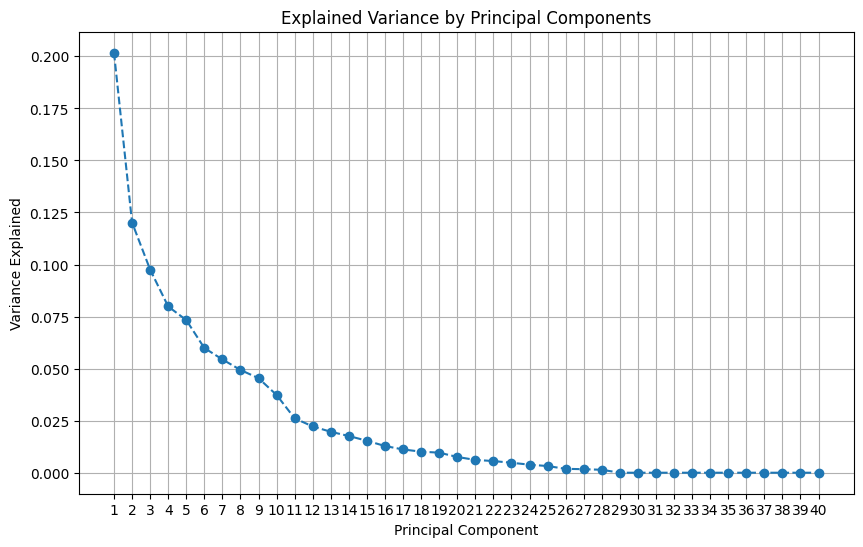

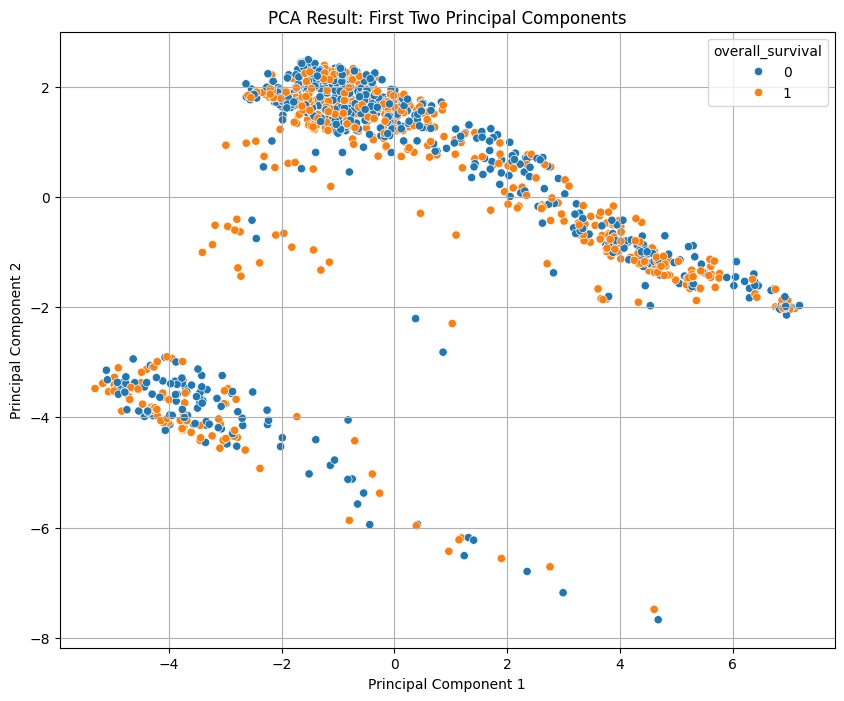

In [30]:
# Set a threshold
threshold = 0.5  # Change this value based on your needs

# Create a mask for correlations greater than the threshold
mask = (correlation_matrix.abs() >= threshold) & (correlation_matrix != 1)

# Get the columns that meet the threshold criteria
highly_correlated_columns = mask.any(axis=1)
filtered_columns = correlation_matrix.columns[highly_correlated_columns]

# Subset the DataFrame
filtered_df = df[filtered_columns]

# Perform PCA
pca = PCA(n_components=min(filtered_df.shape)-1)  # Number of components to keep
pca_result = pca.fit_transform(filtered_df)

# Create a DataFrame with PCA results
pca_df = pd.DataFrame(data=pca_result, columns=[f'PC{i+1}' for i in range(pca_result.shape[1])])

# Visualize the explained variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker='o', linestyle='--')
plt.title('Explained Variance by Principal Components')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.xticks(range(1, len(pca.explained_variance_ratio_) + 1))
plt.grid()
plt.show()

# Optionally, visualize the first two principal components
plt.figure(figsize=(10, 8))
sns.scatterplot(x=pca_df['PC1'], y=pca_df['PC2'], hue=response["overall_survival"])
plt.title('PCA Result: First Two Principal Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid()
plt.show()

In [13]:
mut_columns = df.columns[df.columns.str.contains('_mut_')]
correlation_matrix = df[mut_columns].corr()
correlation_matrix

pik3ca_mut_deletion  pik3ca_mut_delins  \
pik3ca_mut_deletion                 1.000000           0.023003   
pik3ca_mut_delins                   0.023003           1.000000   
pik3ca_mut_frameshift              -0.037802          -0.088609   
pik3ca_mut_insertion                0.037802           0.088609   
pik3ca_mut_missense                      NaN                NaN   
...                                      ...                ...   
smarcb1_mut_missense               -0.039509           0.034418   
smarcb1_mut_no_mutation             0.039509          -0.034418   
stmn2_mut_missense                 -0.030986           0.043000   
stmn2_mut_no_mutation               0.030986          -0.043000   
siah1_mut_no_mutation              -0.052997           0.010762   

                         pik3ca_mut_frameshift  pik3ca_mut_insertion  \
pik3ca_mut_deletion                  -0.037802              0.037802   
pik3ca_mut_delins                    -0.088609              0.088609   
pik3ca_mut_frameshift                 1.000000             -1.000000   
pik3ca_mut_insertion                 -1.000000              1.000000   
pik3ca_mut_missense                        NaN                   NaN   
...                                        ...                   ...   
smarcb1_mut_missense                 -0.016288              0.016288   
smarcb1_mut_no_mutation               0.016288             -0.016288   
stmn2_mut_missense                   -0.032661              0.032661   
stmn2_mut_no_mutation                 0.032661             -0.032661   
siah1_mut_no_mutation                 0.029606             -0.029606   

                         pik3ca_mut_missense  pik3ca_mut_mixed  \
pik3ca_mut_deletion                      NaN         -0.019981   
pik3ca_mut_delins                        NaN         -0.005357   
pik3ca_mut_frameshift                    NaN         -0.032661   
pik3ca_mut_insertion                     NaN          0.032661   
pik3ca_mut_missense                      NaN               NaN   
...                                      ...               ...   
smarcb1_mut_missense                     NaN         -0.005896   
smarcb1_mut_no_mutation                  NaN          0.005896   
stmn2_mut_missense                       NaN         -0.006814   
stmn2_mut_no_mutation                    NaN          0.006814   
siah1_mut_no_mutation                    NaN         -0.006814   

                         pik3ca_mut_no_mutation  tp53_mut_deletion  \
pik3ca_mut_deletion                   -0.074054           0.001533   
pik3ca_mut_delins                      0.008447          -0.029264   
pik3ca_mut_frameshift                  0.030660          -0.056449   
pik3ca_mut_insertion                  -0.030660           0.056449   
pik3ca_mut_missense                         NaN                NaN   
...                                         ...                ...   
smarcb1_mut_missense                  -0.056589           0.072911   
smarcb1_mut_no_mutation                0.056589          -0.072911   
stmn2_mut_missense                     0.013588          -0.022832   
stmn2_mut_no_mutation                 -0.013588           0.022832   
siah1_mut_no_mutation                  0.013588          -0.022832   

                         tp53_mut_delins  tp53_mut_frameshift  ...  \
pik3ca_mut_deletion             0.059911             0.079822  ...   
pik3ca_mut_delins              -0.011278             0.019355  ...   
pik3ca_mut_frameshift           0.052098            -0.000890  ...   
pik3ca_mut_insertion           -0.052098             0.000890  ...   
pik3ca_mut_missense                  NaN                  NaN  ...   
...                                  ...                  ...  ...   
smarcb1_mut_missense           -0.007532             0.015665  ...   
smarcb1_mut_no_mutation         0.007532            -0.015665  ...   
stmn2_mut_missense             -0.008705             0.006673  ...   
stmn2_mut_no_mutation

In [14]:
# Set a threshold
threshold = 0.5  # You can change this value based on your needs

# Create a mask for correlations greater than the threshold
mask = (correlation_matrix.abs() >= threshold) & (correlation_matrix != 1)

# Create a new DataFrame to hold the filtered correlations
filtered_correlation_matrix = correlation_matrix.where(mask)

# Create heatmap
plt.figure(figsize=(50, 50), dpi=300)  # Adjust the size as needed
sns.heatmap(filtered_correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True, cbar_kws={"shrink": .8}, mask=filtered_correlation_matrix.isnull())
plt.title('Filtered Correlation Plot (Threshold: {})'.format(threshold))
plt.show()

In [20]:
correlation_list = []
for i in range(len(filtered_correlation_matrix.columns)):
    for j in range(i + 1, len(filtered_correlation_matrix.columns)):
        if mask.iloc[i, j]:  # If the correlation is greater than the threshold
            feature_1 = filtered_correlation_matrix.columns[i]
            feature_2 = filtered_correlation_matrix.columns[j]
            if feature_1.split('_')[0] == feature_2.split('_')[0]:
                continue
            correlation_value = filtered_correlation_matrix.iloc[i, j]
            correlation_list.append((feature_1, feature_2, correlation_value))

# Convert to a DataFrame for easy viewing
correlation_df = pd.DataFrame(correlation_list, columns=['Feature 1', 'Feature 2', 'Correlation'])
correlation_df

Feature 1               Feature 2  Correlation
0     pik3ca_mut_frameshift       cdh1_mut_deletion     0.587224
1      pik3ca_mut_insertion       cdh1_mut_deletion    -0.587224
2    pik3ca_mut_no_mutation       tp53_mut_deletion    -0.572002
3    pik3ca_mut_no_mutation     tp53_mut_frameshift    -0.691935
4    pik3ca_mut_no_mutation        kmt2c_mut_splice     0.924269
..                      ...                     ...          ...
135   foxo1_mut_no_mutation       nt5e_mut_missense    -1.000000
136   prkg1_mut_no_mutation  tbl1xr1_mut_frameshift    -0.953056
137       sgcd_mut_missense     spaca1_mut_missense    -0.631651
138    sgcd_mut_no_mutation     spaca1_mut_missense    -0.773939
139  spaca1_mut_no_mutation   rasgef1b_mut_missense    -1.000000

[140 rows x 3 columns]